In [1]:
import pandas as pd
import numpy as np
import re
import os
from datasets import load_dataset

print("Complete")

Complete


In [2]:
# Load Trip Avisor Dataset
hotel_data = pd.read_csv("/kaggle/input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv")
hotel_data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [3]:
hotel_data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [5]:
# drops rows if there are missing values
hotel_data.dropna(inplace=True)

# check for duplicate reviews
duplicates = hotel_data.duplicated(subset = 'Review', keep = 'first')
hotel_data = hotel_data.drop_duplicates(subset = 'Review', keep = 'first')

In [6]:
hotel_data.isnull().sum().sort_values()

Review    0
Rating    0
dtype: int64

In [7]:
# Clean text
# remove speical characters, numbers, and extra whitespace
def cleaned_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text) # keep letters
    text = re.sub(r'\s+', ' ', text).strip() # removes extra spaces
    return text.lower() # returns all lowercase

hotel_data['Cleaned_Review'] = hotel_data['Review'].apply(cleaned_text)

# Save dataset
cleaned_file_path = 'cleaned_hotel_reviews.csv'
hotel_data.to_csv(cleaned_file_path, index=False)

# look at rows again
hotel_data.head()

,Review,Rating,Cleaned_Review
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not experience hotel monaco seattle...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...


In [8]:
y = hotel_data.Cleaned_Review
X = hotel_data.Rating

print(y,X)

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not experience hotel monaco seattle...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay went seahawk game awesom...
                               ...                        
20486    best kept secret rd time staying charm not sta...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside desk staff n...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking ca nt believe excellent ratings...
Name: Cleaned_Review, Length: 20491, dtype: object 0        4
1        2
2        3
3        5
4        5
        ..
20486    5
20487    4
20488    2
20489    1
20490    2
Name: Rating, Length: 20491, dtype: int64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64


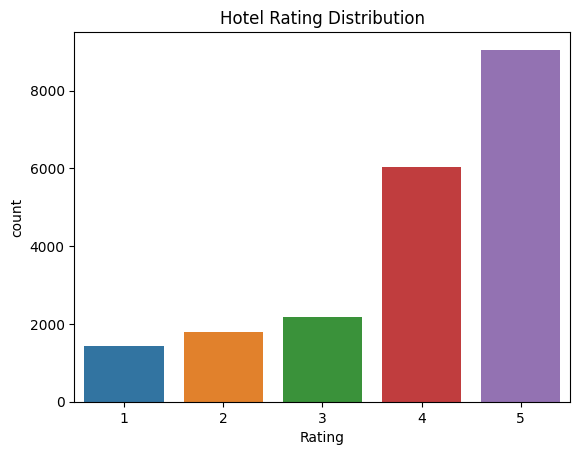

In [10]:
print(hotel_data['Rating'].value_counts())
sns.countplot(x = 'Rating', data = hotel_data)
plt.title('Hotel Rating Distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


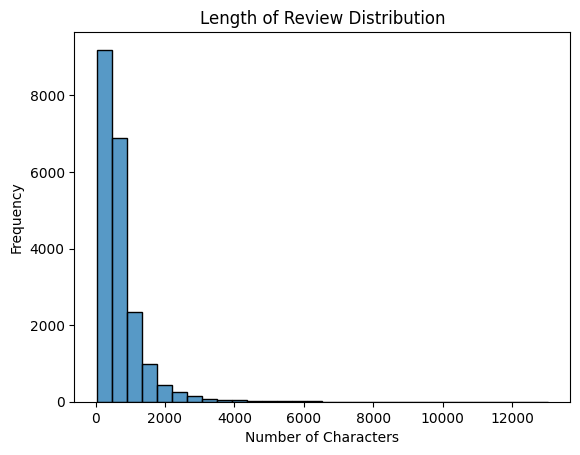

In [11]:
hotel_data['Review_Length'] = hotel_data['Cleaned_Review'].apply(len)
sns.histplot(hotel_data['Review_Length'], bins = 30)
plt.title('Length of Review Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

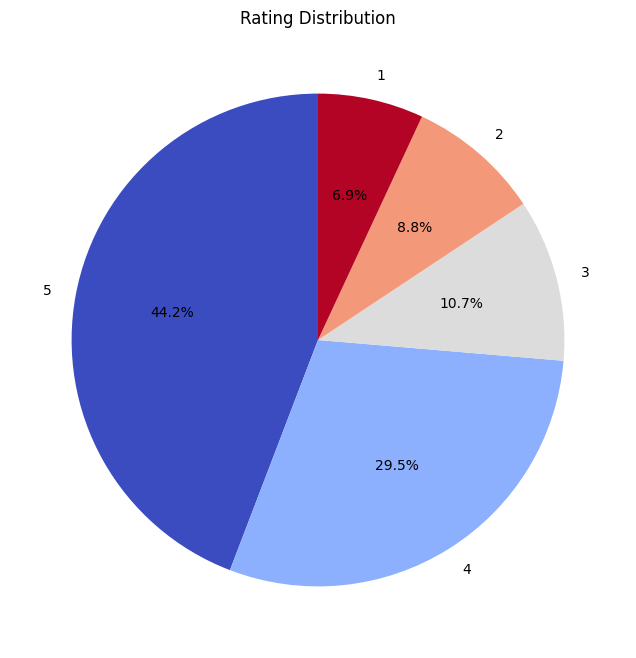

In [12]:
# Pie chart for rating distribution
plt.figure(figsize=(8, 8))
hotel_data['Rating'].value_counts().plot.pie(autopct='%1.1f%%', cmap='coolwarm', startangle=90)
plt.title('Rating Distribution')
plt.ylabel('')
plt.show()

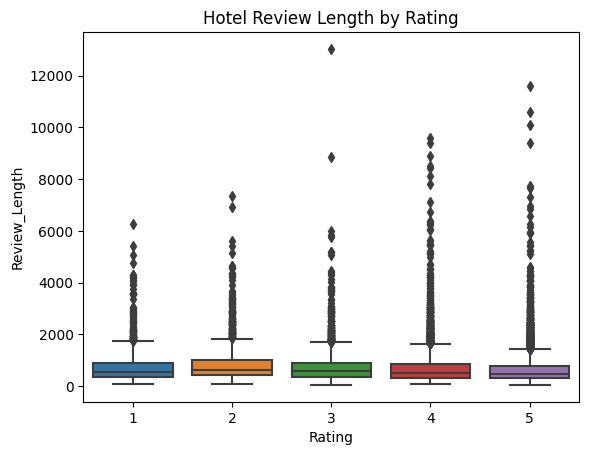

In [13]:
# Same plot, different look 
sns.boxplot(x = 'Rating', y = 'Review_Length', data = hotel_data)
plt.title('Hotel Review Length by Rating')
plt.show()

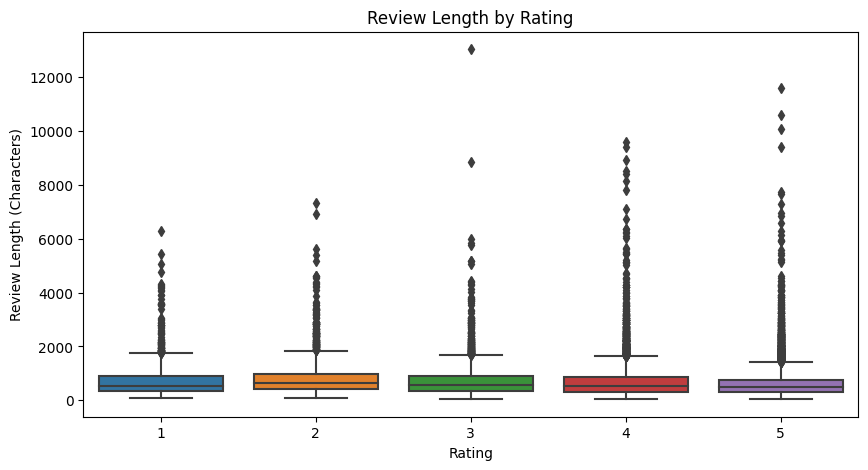

In [14]:
# Review length analysis
plt.figure(figsize=(10, 5))
sns.boxplot(x='Rating', y = hotel_data['Cleaned_Review'].apply(len), data = hotel_data)
plt.title('Review Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length (Characters)')
plt.show()

Note: Wordcloud isnt that useful but its kinda fun to look at.

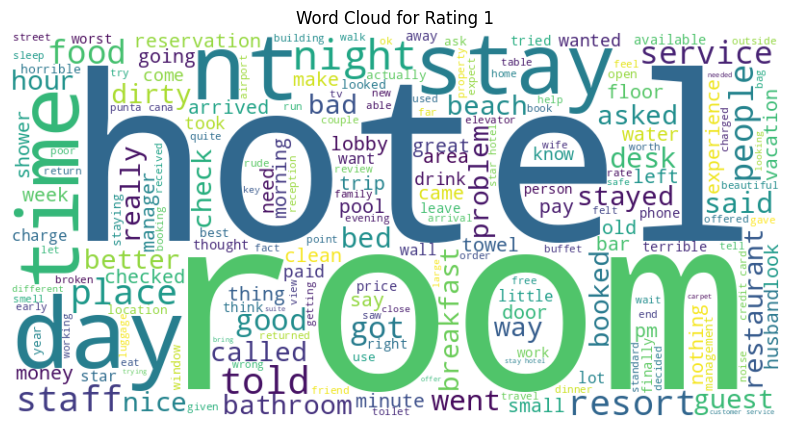

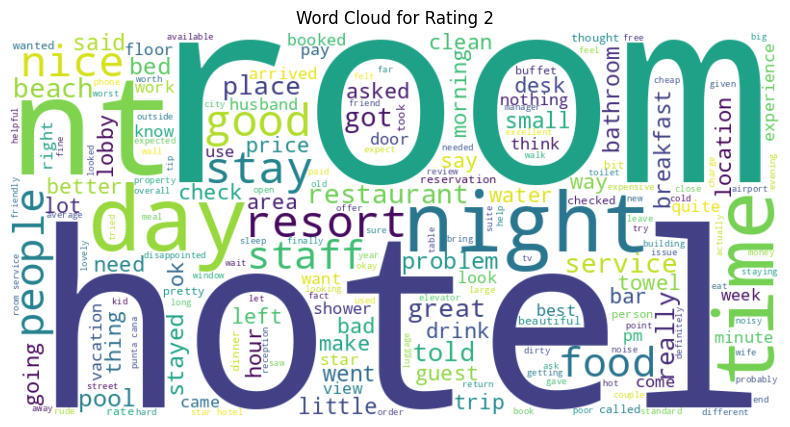

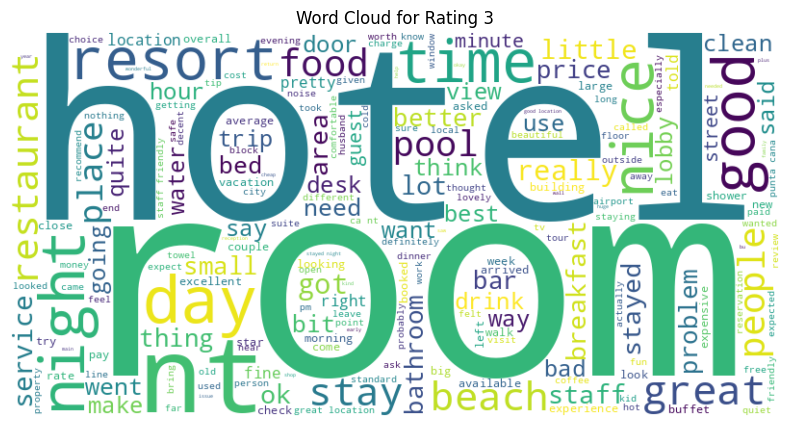

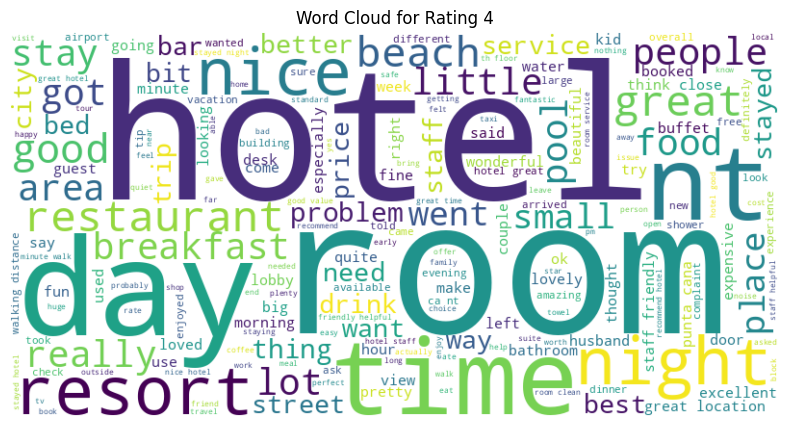

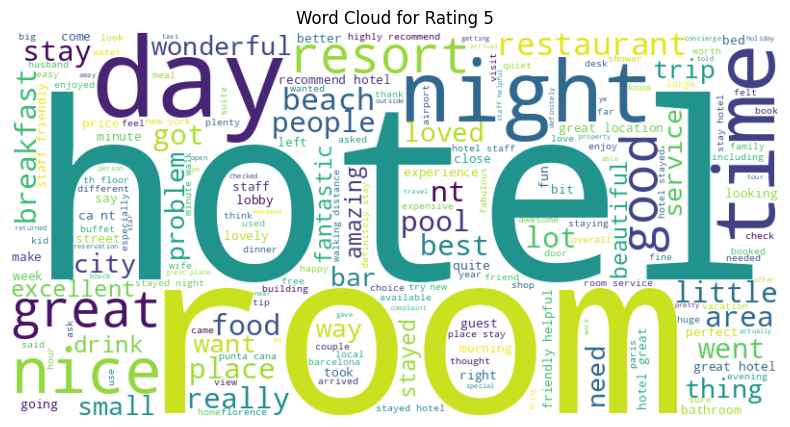

In [15]:
# Generate word clouds for positive and negative reviews
positive_reviews = ' '.join(hotel_data[hotel_data['Rating'] >= 4]['Cleaned_Review'])
neutral_reviews = ' '.join(hotel_data[hotel_data['Rating'] == 3]['Cleaned_Review'])
negative_reviews = ' '.join(hotel_data[hotel_data['Rating'] <= 2]['Cleaned_Review'])

# Generate word clouds for different rating categories
for rating in sorted(hotel_data['Rating'].unique()):
    text = ' '.join(hotel_data[hotel_data['Rating'] == rating]['Cleaned_Review'])
    wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Rating {rating}')
    plt.show()

Note that the negative review cloud also sees that hotel, time, resort, and people are also used the most.

Hotel is the most used word. Followed by room, nt, day, good, etc...

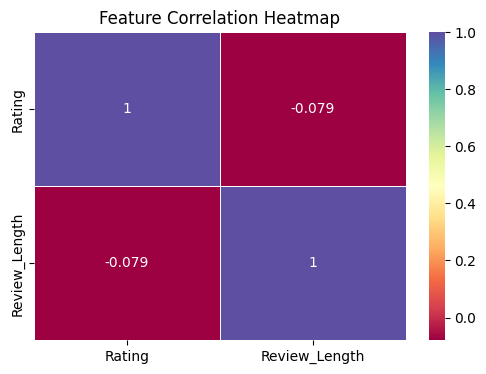

In [16]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(hotel_data.corr(numeric_only=True), annot=True, linewidths=0.5,  cmap='Spectral')
plt.title('Feature Correlation Heatmap')
plt.show()

In [17]:
# Libraries
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
print("Libraries loaded")

Libraries loaded


Note:
- Count Vectorization gives a more simple representation of the text, but it doesnt account for word importance since it is simply counting the words. So it may be biased towards the common words used like 'hotel' and 'room'.
- TF-IDF is very similar to implement but it adjusts the weights for how important a word is relative to all the documents. So it will account for word importance and may reduce the impact of the fequent words like 'hotel' and 'room'.

Convert text data into numerical vectors using TF-IDF Vectorization

In [18]:
# remove neutral 3-star reviews - ambiguous and nuanced, could confuse model
hotel_data = hotel_data[hotel_data['Rating'] != 3]

# convert ratings into sentiment labels
# binary classification - positive vs negative
hotel_data['Sentiment'] = hotel_data['Rating'].apply(lambda x: 1 if x >= 4 else 0)  # 1 is positive, 0 is negative

# Balance the classes, there are significantly more pos reviews than neg
from sklearn.utils import resample

# Separate classes
pos = hotel_data[hotel_data['Sentiment'] == 1]
neg = hotel_data[hotel_data['Sentiment'] == 0]

# Downsample positive reviews
pos_down = resample(pos, replace=False, n_samples=len(neg), random_state=42)

# Combine and shuffle
balanced_data = pd.concat([pos_down, neg]).sample(frac=1, random_state=42)

# Extract features using TF-IDF Vectorization (unigrams + bigrams)
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X = vectorizer.fit_transform(balanced_data['Cleaned_Review'])
y = balanced_data['Sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Working")

Working


Count Vectorization - converts text data into numerical feature vectors.
- For now I have it commented out because I think using Tfidf vectorization is more useful. Come back to it later.

- Note: TF-IDF bigrams (words and short phrases) helped most models improve accuracy, including the best performer, compared to unigrams (just words)

Unigrams:
- Optimized Logistic Regression Accuracy: 0.9315707620528771
- Logistic Regression Accuracy:  0.9300155520995335
- Random Forest Accuracy:  0.9004665629860031
- Support Vector Machine (SVM) Accuracy:  0.9230171073094868
- Naive Bayes Accuracy:  0.9284603421461898

Unigrams + Bigrams:
- Optimized Logistic Regression Accuracy: 0.9370139968895801 ------ (+0.54)
- Logistic Regression Accuracy:  0.9284603421461898
- Random Forest Accuracy:  0.9090202177293935 ------ (+0.85)
- Support Vector Machine (SVM) Accuracy:  0.9300155520995335 ------ (+0.70)
- Naive Bayes Accuracy:  0.9237947122861586

Custom and standard english stop words removed (Not included in current version):
- Optimized Logistic Regression Accuracy: 0.9300155520995335
- Logistic Regression Accuracy:  0.9300155520995335
- Random Forest Accuracy:  0.9105754276827371
- Support Vector Machine (SVM) Accuracy:  0.9284603421461898
- Naive Bayes Accuracy:  0.9300155520995335

Strangely, regression and naive bayes have exact same results

In [19]:
# vectorizer = CountVectorizer(binary = True, stop_words = 'english')
# X = vectorizer.fit_transform(hotel_data['Cleaned_Review'])
# y = hotel_data['Rating'].apply(lambda x: 1 if x > 3 else 0) # converts ratings into binary sentiment: 1 = positive, 0 = negative

# Split dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Best Logistic Regression Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Optimized Logistic Regression Accuracy: 0.9416796267496111
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       643
           1       0.94      0.94      0.94       643

    accuracy                           0.94      1286
   macro avg       0.94      0.94      0.94      1286
weighted avg       0.94      0.94      0.94      1286



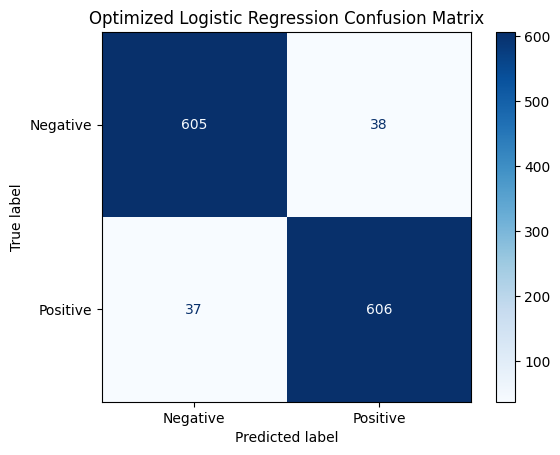

In [20]:
# Define parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],  # L1 = Lasso, L2 = Ridge
    'solver': ['liblinear'],  # Required for L1 penalty
}

# Perform GridSearchCV
log_reg = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Find best parameters and train model
best_log_reg = grid_search.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print("Best Logistic Regression Parameters:", grid_search.best_params_)
print("Optimized Logistic Regression Accuracy:", accuracy_log_reg)
print(classification_report(y_test, y_pred_log_reg))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap='Blues')
plt.title("Optimized Logistic Regression Confusion Matrix")
plt.show()

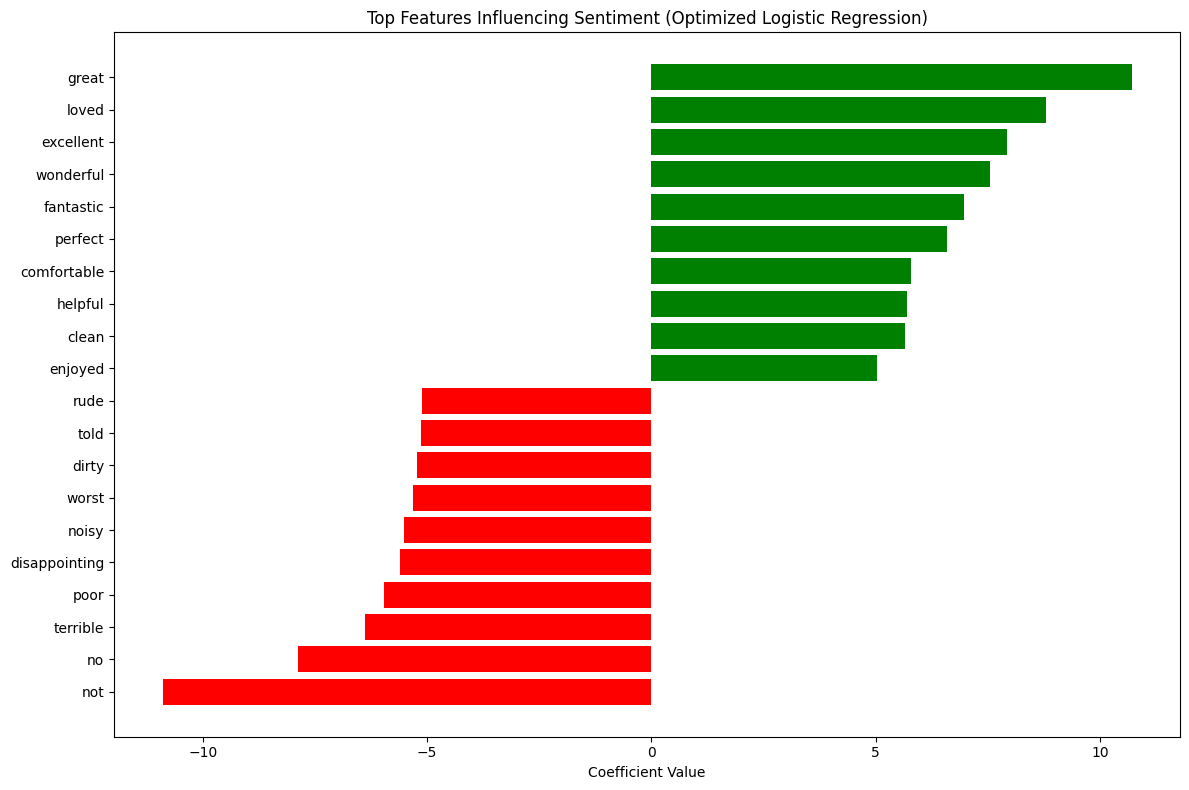

In [21]:
# Let's look at the most influential features

# Get feature names and model coefficients (feature weight)
feature_names = vectorizer.get_feature_names_out()
coefficients = best_log_reg.coef_[0]

# Select top N features for each class
top_n = 10
top_pos_idx = np.argsort(coefficients)[-top_n:]
top_neg_idx = np.argsort(coefficients)[:top_n]

top_pos_features = [(feature_names[i], coefficients[i]) for i in top_pos_idx]
top_neg_features = [(feature_names[i], coefficients[i]) for i in top_neg_idx]

# Combine and prepare for plotting
labels = [f[0] for f in top_neg_features] + [f[0] for f in top_pos_features]
values = [f[1] for f in top_neg_features] + [f[1] for f in top_pos_features]
colors = ['red'] * top_n + ['green'] * top_n

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(labels, values, color=colors)
ax.set_title("Top Features Influencing Sentiment (Optimized Logistic Regression)")
ax.set_xlabel("Coefficient Value")
plt.tight_layout()
plt.show()


Logistic Regression Accuracy:  0.9354587869362364

               precision    recall  f1-score   support

           0       0.94      0.93      0.94       643
           1       0.93      0.94      0.94       643

    accuracy                           0.94      1286
   macro avg       0.94      0.94      0.94      1286
weighted avg       0.94      0.94      0.94      1286



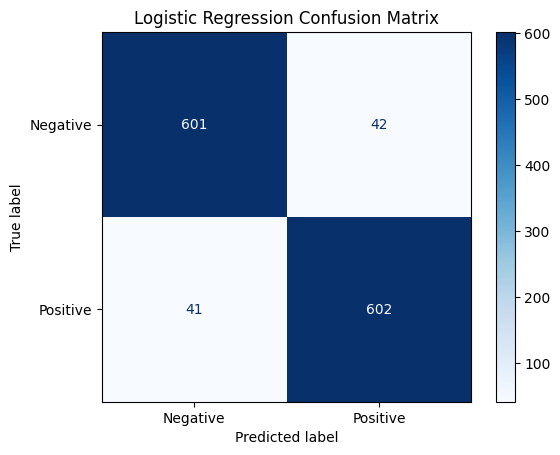

In [22]:
# Logistic Regression Model without using GridSearchCV
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Check the accuracy of the model and scores from the classification report (includes F1)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy: ", accuracy_logreg)
print("\n", classification_report(y_test, y_pred_logreg))

cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


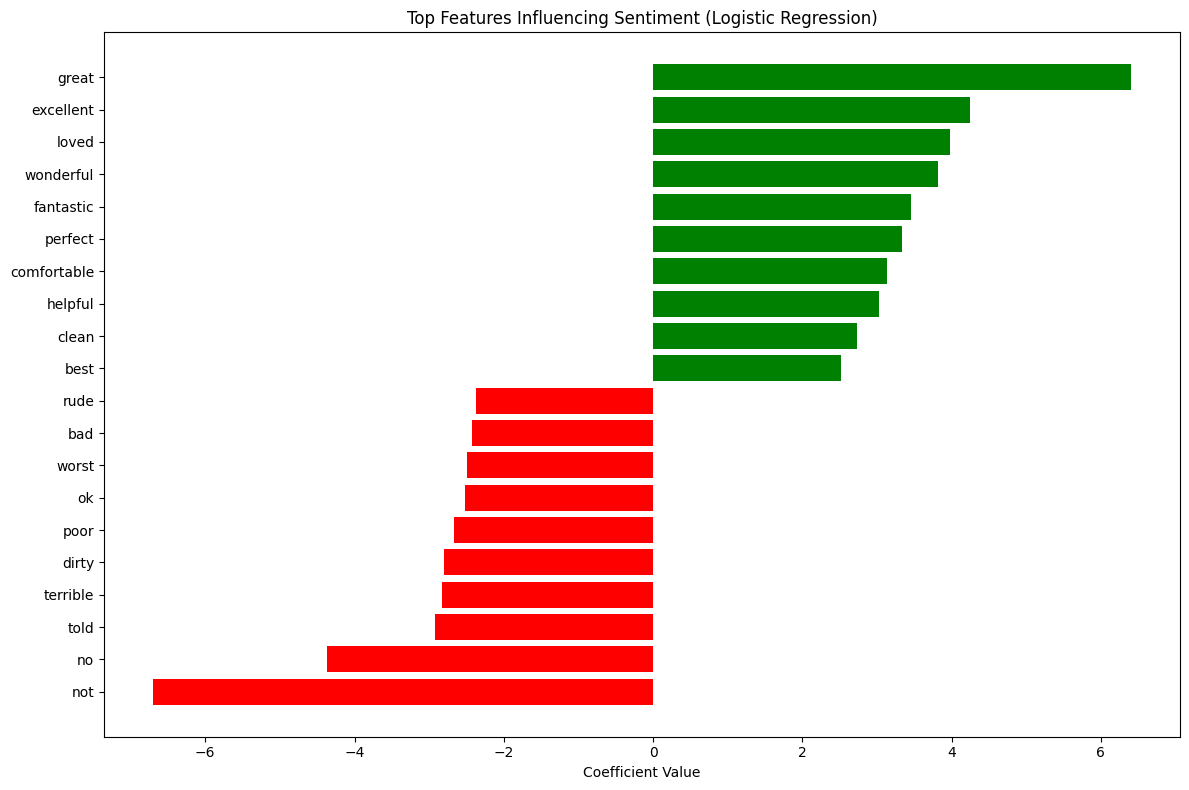

In [23]:
# Let's look at the most influential features

# Get feature names and model coefficients (feature weight)
feature_names = vectorizer.get_feature_names_out()
coefficients = logreg.coef_[0]

# Select top N features for each class
top_n = 10
top_pos_idx = np.argsort(coefficients)[-top_n:]
top_neg_idx = np.argsort(coefficients)[:top_n]

top_pos_features = [(feature_names[i], coefficients[i]) for i in top_pos_idx]
top_neg_features = [(feature_names[i], coefficients[i]) for i in top_neg_idx]

# Combine and prepare for plotting
labels = [f[0] for f in top_neg_features] + [f[0] for f in top_pos_features]
values = [f[1] for f in top_neg_features] + [f[1] for f in top_pos_features]
colors = ['red'] * top_n + ['green'] * top_n

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(labels, values, color=colors)
ax.set_title("Top Features Influencing Sentiment (Logistic Regression)")
ax.set_xlabel("Coefficient Value")
plt.tight_layout()
plt.show()


Random Forest Accuracy:  0.9082426127527217

               precision    recall  f1-score   support

           0       0.91      0.91      0.91       643
           1       0.91      0.91      0.91       643

    accuracy                           0.91      1286
   macro avg       0.91      0.91      0.91      1286
weighted avg       0.91      0.91      0.91      1286



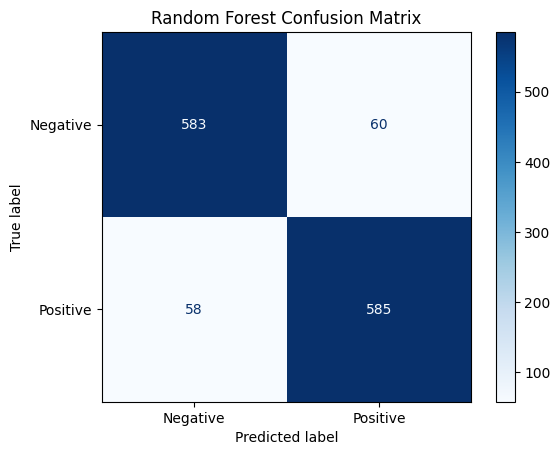

In [24]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Check accuracy and F1
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy: ", accuracy_rf)
print("\n", classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

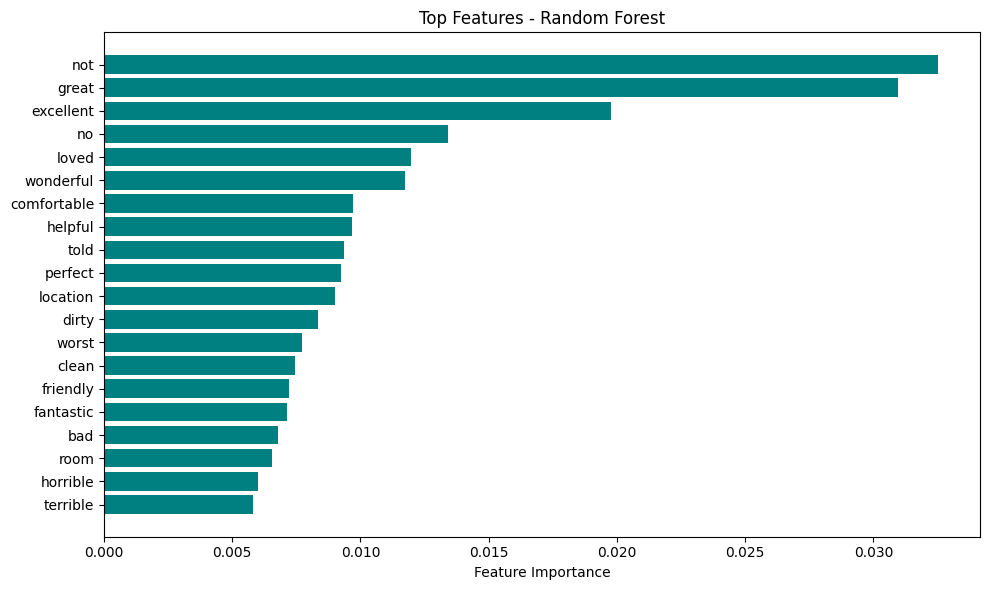

In [25]:
# Let's see which features contributed the most to reducing impurity across the trees

# Get feature importances
importances = rf.feature_importances_
feature_names = vectorizer.get_feature_names_out()
top_idx = np.argsort(importances)[-20:]

labels = [feature_names[i] for i in top_idx]
values = [importances[i] for i in top_idx]

plt.figure(figsize=(10, 6))
plt.barh(labels, values, color='teal')
plt.title("Top Features - Random Forest")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

Support Vector Machine (SVM) Accuracy:  0.9362363919129082

               precision    recall  f1-score   support

           0       0.93      0.94      0.94       643
           1       0.94      0.93      0.94       643

    accuracy                           0.94      1286
   macro avg       0.94      0.94      0.94      1286
weighted avg       0.94      0.94      0.94      1286



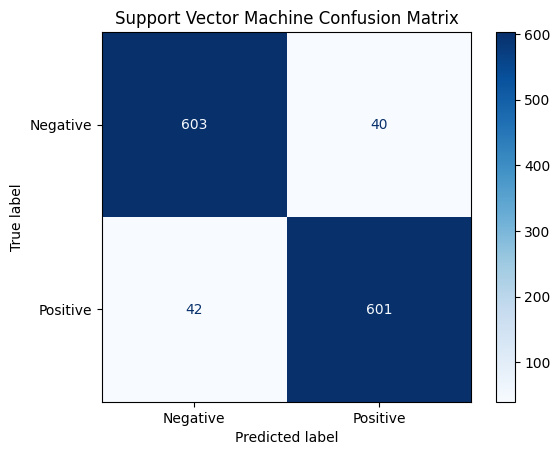

In [26]:
# Support Vector Machine Model
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Check accuracy and F1
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine (SVM) Accuracy: ", accuracy_svm)
print("\n", classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap='Blues')
plt.title("Support Vector Machine Confusion Matrix")
plt.show()

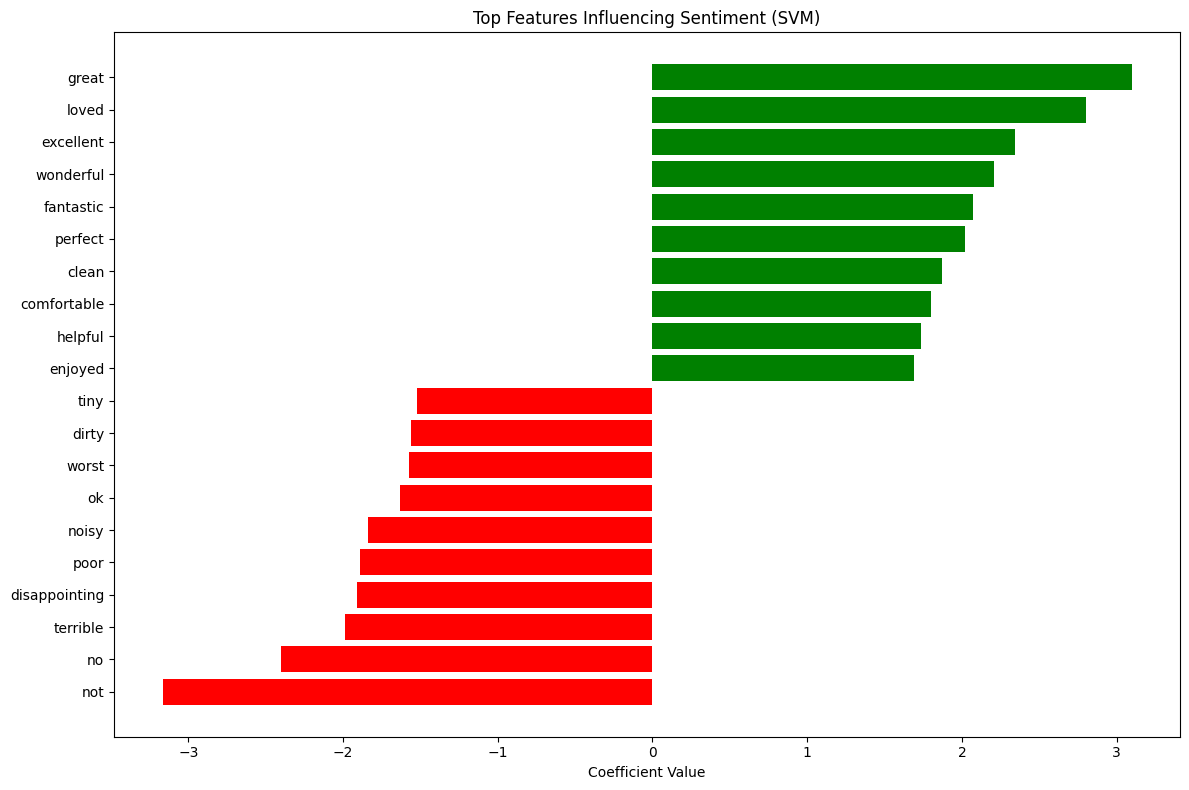

In [27]:
# Get feature names and model coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = svm.coef_[0]  # svm = trained LinearSVC or SVC(kernel='linear')

# Convert feature names from numpy object to plain strings (avoid hidden arrays)
feature_names = np.array(feature_names, dtype=str)

# Select top N features for each class
top_n = 10
top_pos_idx = np.argsort(coefficients)[-top_n:]
top_neg_idx = np.argsort(coefficients)[:top_n]

top_pos_features = [(feature_names[i], coefficients[i]) for i in top_pos_idx]
top_neg_features = [(feature_names[i], coefficients[i]) for i in top_neg_idx]

# Combine and prepare for plotting
labels = [f[0] for f in top_neg_features] + [f[0] for f in top_pos_features]
values = [f[1] for f in top_neg_features] + [f[1] for f in top_pos_features]
colors = ['red'] * top_n + ['green'] * top_n

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(labels, values, color=colors)
ax.set_title("Top Features Influencing Sentiment (SVM)")
ax.set_xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

Naive Bayes Accuracy:  0.9292379471228616

               precision    recall  f1-score   support

           0       0.93      0.92      0.93       643
           1       0.92      0.93      0.93       643

    accuracy                           0.93      1286
   macro avg       0.93      0.93      0.93      1286
weighted avg       0.93      0.93      0.93      1286



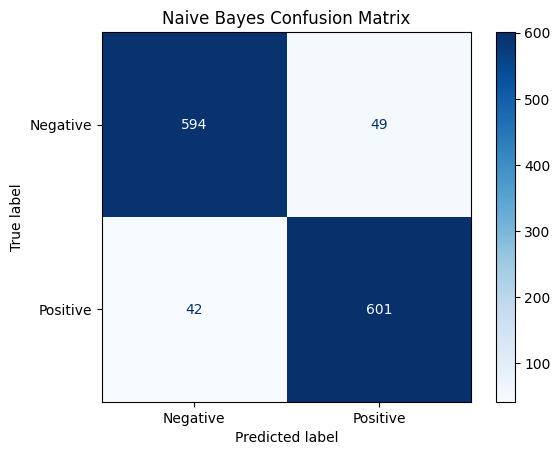

In [28]:
# Naive Bayes Classification
nbay = MultinomialNB()
nbay.fit(X_train, y_train)
y_pred_nbay = nbay.predict(X_test)

# Check accuracy and F1
accuracy_nbay = accuracy_score(y_test, y_pred_nbay)
print("Naive Bayes Accuracy: ", accuracy_nbay)
print("\n", classification_report(y_test, y_pred_nbay))

cm = confusion_matrix(y_test, y_pred_nbay)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

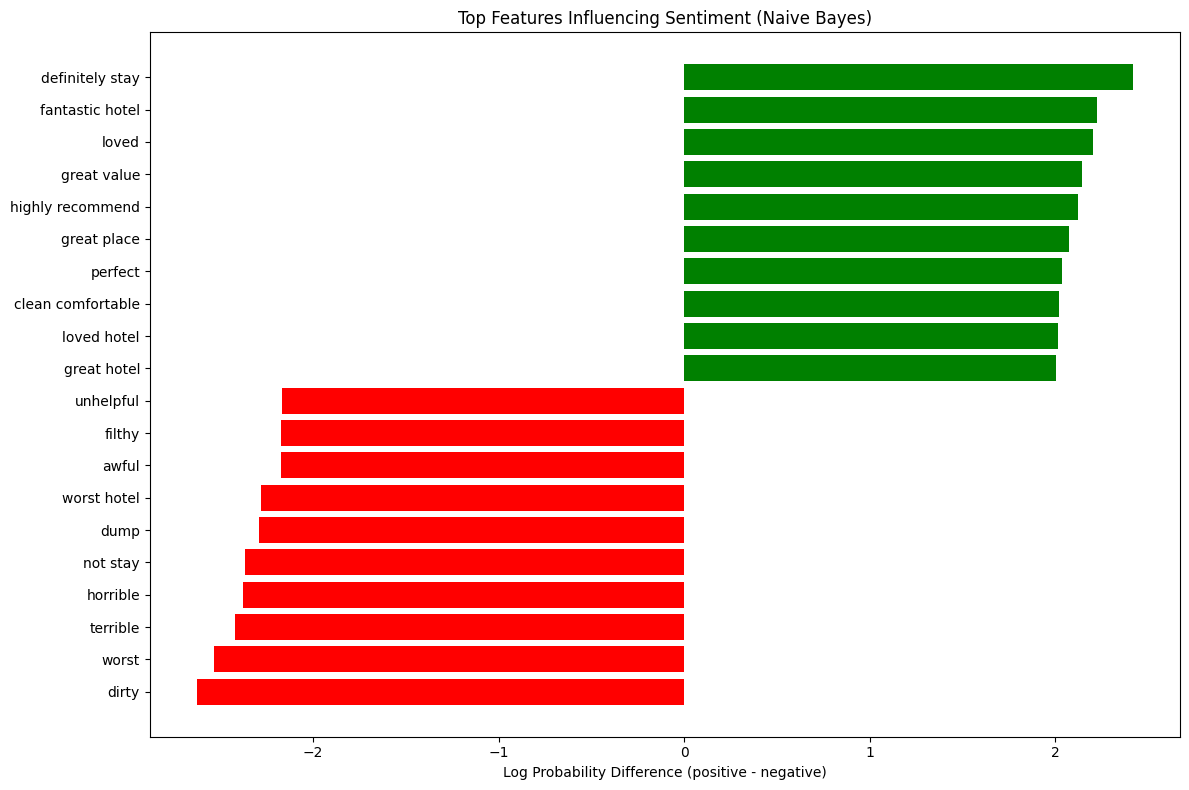

In [29]:
# Get feature names and log probabilities
feature_names = vectorizer.get_feature_names_out()
log_prob_class0 = nbay.feature_log_prob_[0]  # Negative class
log_prob_class1 = nbay.feature_log_prob_[1]  # Positive class

# Difference in log-probability for each feature
log_prob_diff = log_prob_class1 - log_prob_class0  # Positive = pushes prediction toward positive sentiment

# Get top features by absolute difference
top_n = 10
top_pos_idx = np.argsort(log_prob_diff)[-top_n:]
top_neg_idx = np.argsort(log_prob_diff)[:top_n]

# Format data
top_pos_features = [(feature_names[i], log_prob_diff[i]) for i in top_pos_idx]
top_neg_features = [(feature_names[i], log_prob_diff[i]) for i in top_neg_idx]

labels = [f[0] for f in top_neg_features] + [f[0] for f in top_pos_features]
values = [f[1] for f in top_neg_features] + [f[1] for f in top_pos_features]
colors = ['red'] * top_n + ['green'] * top_n

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(labels, values, color=colors)
ax.set_title("Top Features Influencing Sentiment (Naive Bayes)")
ax.set_xlabel("Log Probability Difference (positive - negative)")
plt.tight_layout()
plt.show()

In [30]:
# Which model is performing the best
accuracies = {'Optimized Logistic Regresssion': accuracy_log_reg, 'Logistic Regression': accuracy_logreg, 'Random Forest': accuracy_rf,
                   'Support Vector Machine': accuracy_svm, 'Naive Bayes': accuracy_nbay}
best = max(accuracies, key = accuracies.get)
print(f"The best performing model is {best} with an accuracy of {accuracies[best]:.4f}")

The best performing model is Optimized Logistic Regresssion with an accuracy of 0.9417


In [31]:
# Packaging best performing model and vectorizer

from joblib import dump

dump(best_log_reg, "sentiment_analysis.joblib")
print("model saved")
dump(vectorizer, "vectorizer.joblib")
print("vect saved")

model saved
vect saved


In [32]:
# Download the dump files
from IPython.display import FileLink

FileLink("sentiment_analysis.joblib")

/kaggle/working/sentiment_analysis.joblib

In [33]:
FileLink("vectorizer.joblib")

/kaggle/working/vectorizer.joblib